## Data Question 1: An Exploration of UN data

available on https://github.com/nss-data-science-cohort-6/un_data_question-tomoumer

1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

3. In the first cell of your notebook, import the required packages with their customary aliases as follows (see the python below):

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
- Take a look at the first 10 rows.
- Look at the last 5 rows. Do you see a problem?
- Redo the read_csv() call to correct this issue - do not modify the original csv file.

> looked at that with the .head(10) and .tail() function, found out we have to remove the last 2 rows because they are footnotes

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

> Done with 2 separate functions and then I aggregated them.

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

> checked with gdp_df.info() and gdp_df.shape, 3 columns 6868 rows and columns are object, int and float

In [94]:
gdp_df = (
    pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')
    .drop(columns = 'Value Footnotes')
    .rename(columns={
        'Country or Area': 'Country',
        'Value': 'GDP_Per_Capita'
        })
)

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? years 1990 - 2017; number of values increases with years

In [95]:
#gdp_df['Year'].value_counts()
gdp_df['Year'].unique() # we can also run that through sorted - sorted(gdp_df['Year'].unique())

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

<AxesSubplot:>

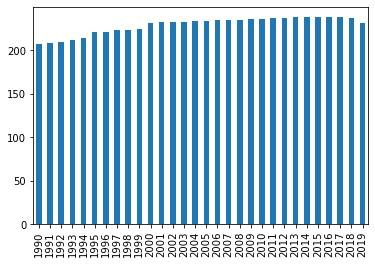

In [96]:
gdp_df['Year'].value_counts().sort_index().plot(kind='bar')

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

>There are 238 countries in the dataset, least represented Nauru, Cayman Islands, Sint Maarten, Turks and Caicos Islands, Djibouti. I'd imagine they were not countries yet in 1991

In [97]:
gdp_df['Country'].nunique()

238

In [98]:
gdp_df['Country'].value_counts(sort=True)

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

> interestingly, gdp_df[gdp_df['Country'] == 'Slovenia'] shows Slovenia as a country in 1990, which most definitely it wasn't until 1991

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [99]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

> poisson, unimodal, right skewed, outliers (can be seen from above too)

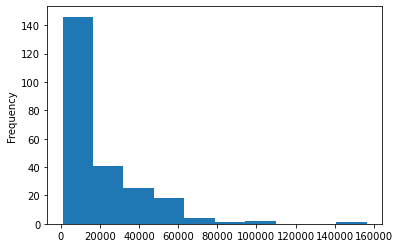

In [100]:
#plt.hist(gdp_2014["GDP_Per_Capita"], bins=10)
#plt.show()

#more concise
gdp_2014['GDP_Per_Capita'].plot(kind='hist', bins=10);

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

> Top 5: Macao SAR, China, Luxembourg, Quatar, Singapore, Bermuda.

> Bottom 5: Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic.

In [101]:
#gdp_2014.sort_values('GDP_Per_Capita', ascending=False).head(5)

#another option to above
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [102]:
#gdp_2014.sort_values('GDP_Per_Capita', ascending=False).tail(5)

#alternative to above
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [103]:
#first select dataset for wanted years 1990, 2017 and then pivot on that, then drop any rows with NaN in
# NOTE: the .loc can be omitted, but it's better for it to be there to be more explicit
gdp_pivoted = (
    gdp_df
        .loc[gdp_df['Year'].isin([1990, 2017])]
        .pivot_table(
            values = 'GDP_Per_Capita',
            index = 'Country',
            columns = 'Year'
        )
        .dropna() #you can subset on just specific columns instead of all with the dropna
)

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

> Answer: 17 countries: gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].info()  (or without the .info if we want to look at them all)

In [104]:
#gdp_pivoted.columns to check columns type -> that's why it's 2017 and not '2017'
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [105]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2017,Percent_Change
Country,,,
Brunei,71230.862143,60995.681114,-14.369026
Burundi,1184.842440,773.571858,-34.710993
Central African Republic,1201.677234,912.802052,-24.039332
Comoros,3061.360665,3032.254682,-0.950753
Congo,5115.210903,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
Gabon,18179.265733,15006.764091,-17.451209
Guinea-Bissau,1994.669656,1925.237737,-3.480873
Haiti,3229.618638,2980.960856,-7.699292


In [106]:
# sums all of the True/False serires, tells us how many True there are in a column!
# we can also do an average .mean() and others
(gdp_pivoted['Percent_Change'] < 0).sum()

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

> a: Equatorial Guinea and this formula would be to get ONLY the max, I.E. the highest: gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()]. Using the code below we see the top 5, and second highest is China

> Equatorial Guinea is all over the place. It appears to have reached a peak in about 2007/2008 and is then steadily in decline. Still a tremendous change in 2017 compared to 1990. China on the other hand I know a little bit more about. They have consistently subscribed to the philosophy of the "sleeping dragon" and over the years slowly but surely building up their economy. Slower growth, but consistent with likely no stopping in the near future. 

In [107]:
#gdp_pivoted.sort_values('Percent_Change', ascending=False).head(2)
top_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[0]
second_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[1]

In [108]:
#this below is the code for drawing the graph on 2 separate plots
#gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc);
#gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = second_pc);
#plt.show()

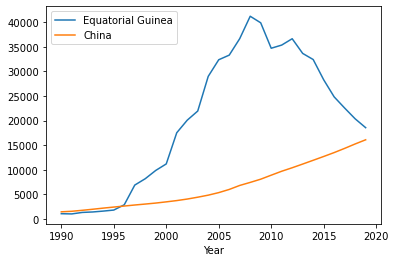

In [109]:
ax = gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc)
gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = second_pc, ax=ax);


17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [110]:
#note: I checked the data with .head() and .tail()
continents = pd.read_csv('../data/continents.csv')

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [111]:
#the inner command, which is used by default, is what makes sure that the country appears in both sets
#also Country can be omitted here since it appears in both
gdp_df = pd.merge(left=gdp_df, right=continents, how='inner', on='Country')

19. Determine the number of countries per continent. Create a bar chart showing this.

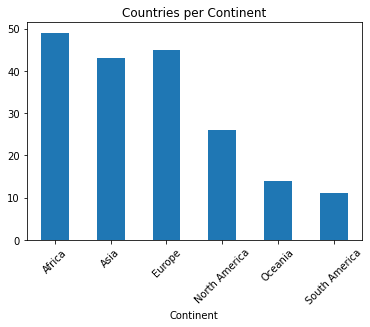

In [112]:
#since there's multiple countries for each year, drop all but one
# and then count by grouping around Continent, using Country as summary
# counting the number of countries (by continent)
# make a bar chart
(
    gdp_df
    .drop_duplicates(subset='Country') # can also use .nunique()
    .groupby('Continent')['Country']
    .count()
    .plot(kind='bar', title='Countries per Continent', rot=45)
);

20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

> all continents have outliers and all appear to be skewed to the right (towards higher GDP)

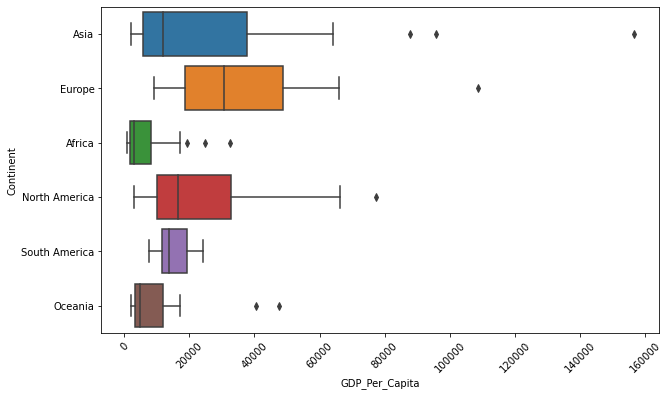

In [121]:
# first need to add continents to gdp_2014
# for seaborn, the "data =" needs to be there, can't just pass the dataframe or other object
# gdp_2014 = pd.merge(gdp_2014, continents, how='inner', on='Country')
# sns.boxplot(data=gdp_2014, x='GDP_Per_Capita', y='Continent');

fig, ax = plt.subplots(figsize = (10,6)) #this makes the plot larger, by scaling the axis

sns.boxplot(
    data = gdp_df.loc[gdp_df['Year'] == 2014],
    x = 'GDP_Per_Capita',
    y = 'Continent',
    ax=ax
)
plt.xticks(rotation = 45); #to rotate the x axis

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [123]:
# also valid life_expectancy = pd.read_csv('../data/life_expectancy.csv', header=2)
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=4)


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [124]:
# personal note, an alternative to drop instead of using (label, axis=1), can use columns = label
# also dropping 2021 which is an empty column and another empty one
# melting on the variable "Country Name" (that one is the fixed)
# finally renaming
life_expectancy = (
    life_expectancy
    .drop(
        columns =[
            'Country Code',
            'Indicator Name',
            'Indicator Code',
            '2021',
            'Unnamed: 66'])
    .melt(
        id_vars='Country Name',
        var_name='Year',                #can also rename later in .rename
        value_name='Life_Expectancy'    #can also rename later in .rename
    )
    .rename(
        columns = {'Country Name' : 'Country'})
)

23. What was the first country with a life expectancy to exceed 80?

> It was Japan in 1996! Obviously this is thanks to Dragon Ball with its original Manga run from 1984 - 1995 ...

In [126]:
(
    life_expectancy
    .loc[life_expectancy['Life_Expectancy'] >= 80]
    .sort_values('Year')
)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


24. Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

> when merging on Year I found out that gdp_df Year is int64 type, the life_expectancy is str. Conversion below, before merging

In [127]:

# life_expectancy.Year = life_expectancy.Year.astype(np.int64)
life_expectancy['Year'] = life_expectancy['Year'].astype(int)
gdp_le = pd.merge(gdp_df, life_expectancy, "inner", on=['Country', 'Year'])

In [24]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377


In [25]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749
5113,Zimbabwe,1990,3324.348171,Africa,58.100


25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?

> 33 countries in 2019 have a life expectancy of 80 years or older

In [26]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == 2019]

In [27]:
gdp_le_2019.loc[gdp_le_2019['Life_Expectancy'] >= 80].info() # or .sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 226 to 4848
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          33 non-null     object 
 1   Year             33 non-null     int64  
 2   GDP_Per_Capita   33 non-null     float64
 3   Continent        33 non-null     object 
 4   Life_Expectancy  33 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB


26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

> Macao SAR, China, Luxembourg, Singapore

In [130]:
#gdp_le_2019.sort_values('GDP_Per_Capita', ascending = False).head(3)
top3_gdp = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()

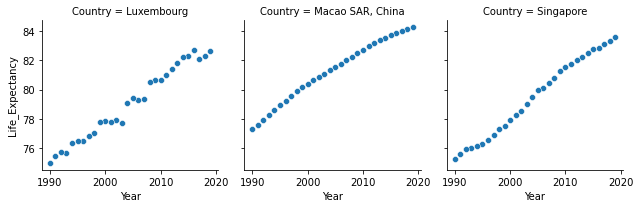

In [131]:
# so FacetGrid sets up how many canvases are needed based on categorical variables
# in my example, I want them in 3 columns (for 3 countries)
# then, we actually need to draw on the plots what we want, by mapping
g = sns.FacetGrid(
    gdp_le.loc[gdp_le['Country'].isin(top3_gdp)],
    col='Country'
)
g.map(sns.scatterplot, 'Year', 'Life_Expectancy');
# could also use this g.map(plt.plot, 'Year', 'Life_Expectancy');

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

> higher GDP per capita seems to indicate longer life expectancy

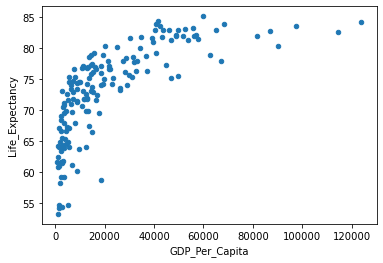

In [132]:
gdp_le_2019.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy');

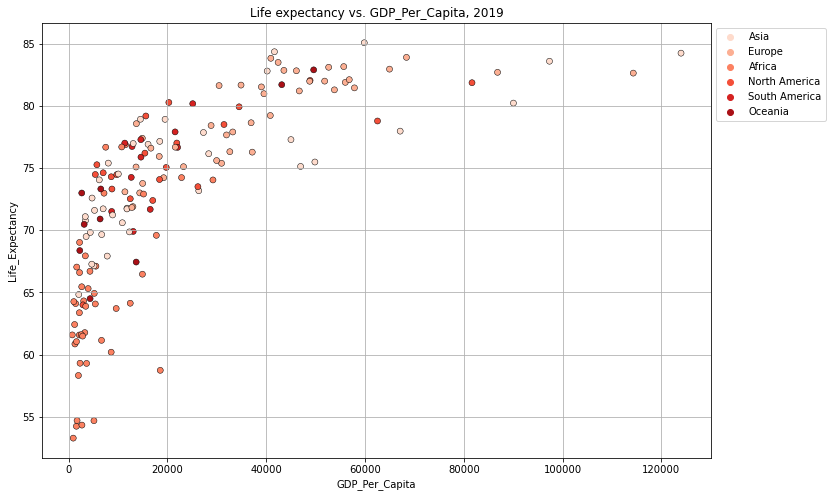

In [133]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = gdp_le_2019, x = 'GDP_Per_Capita', y = 'Life_Expectancy',
                hue = 'Continent', palette = 'Reds', edgecolor = 'black')
plt.title('Life expectancy vs. GDP_Per_Capita, 2019')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

> the number 0.71 seems to be indicating a pretty strong correlation (more GDP typically means more life expectancy); however, looking at the graph the relationship doesn't appear linear;

In [134]:
#gdp_le_2019.corr()
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr() #more explicit than above

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.709018
Life_Expectancy,0.709018,1.000000


29. Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

> the correlation seems to be stronger (0.85 as opposed to 0.71). I was kind of expecting this, as looking at the scatterplot above I thought it might look like a log. So after converting the x values (gdp) to a log scale, the linear relationship between the two is strong.

In [32]:
gdp_le_2019['log_GDP'] = np.log(gdp_le_2019['GDP_Per_Capita'])

/var/folders/3t/x8rz35tn765cm0bkf_n4ydlh0000gn/T/ipykernel_19171/1628252309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_GDP'] = np.log(gdp_le_2019['GDP_Per_Capita'])


In [33]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,log_GDP
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.850396
Life_Expectancy,NaN,0.709018,1.000000,0.848498
log_GDP,NaN,0.850396,0.848498,1.000000


stronger correlation than before!

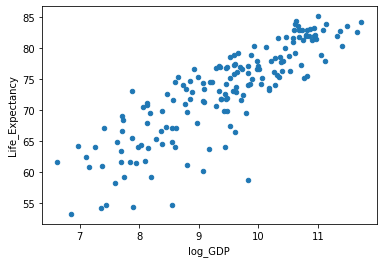

In [135]:
gdp_le_2019.plot(kind='scatter', x='log_GDP', y='Life_Expectancy');

## ALL DONE with exercises!!